In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict

dataset = pd.read_csv('datasets/play_football.csv', sep = ',')

label = LabelEncoder()
dataset = dataset.apply(label.fit_transform)
X = dataset.drop('Play', axis = 1)
Y = dataset['Play']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, Y_train)
model.predict(X_test)[:5] , Y_test[:5]

(array([ 0.62524815,  0.60817764,  0.30032004,  0.36820658,  0.39114978]),
 372    1
 409    1
 350    0
 371    0
 55     0
 Name: Play, dtype: int64)

In [2]:
model.coef_

array([-0.23997106,  0.06788654,  0.39281464, -0.21702786])

In [3]:
model.score(X_test, Y_test)

0.34028551647182492

In [4]:
np.unique(model.predict(X_test))

array([ 0.08329218,  0.30032004,  0.36820658,  0.39114978,  0.40822029,
        0.47240456,  0.54399336,  0.60817764,  0.62524815,  0.63112084,
        0.64819134,  0.69313468,  0.78026216,  0.78396442,  0.8652192 ,
        0.8881624 ,  1.00099228,  1.10519026,  1.1730768 ,  1.24096333])

In [5]:
np.unique(X['Outlook']), np.unique(X['Temp']), np.unique(X['Humidity']), np.unique(X['Windy'])

(array([0, 1, 2]), array([0, 1, 2]), array([0, 1]), array([0, 1]))

In [6]:
X.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy'], dtype='object')

In [7]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > np.mean(y_pred), 1, 0)
accuracy_score(Y_test, y_pred)

0.59999999999999998

In [8]:
y_pred, np.array(Y_test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]))

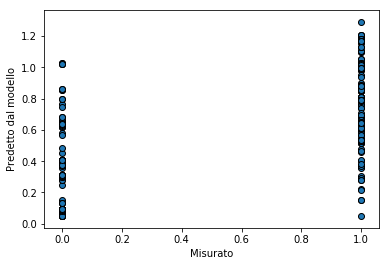

In [9]:
# Visualizzo
predicted = cross_val_predict(model, X, Y, cv = 10)

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors = (0, 0, 0))
ax.set_xlabel('Misurato')
ax.set_ylabel('Predetto dal modello')
plt.show()

# Mostra come i valori che erano 0 e 1 sono stati misurati. 
#(Es. un valore 0 (asse x) è stato misurato 0.5 (asse y)) 